In [2]:
# Load Python libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble, metrics
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [3]:
import sklearn
print(sklearn.__version__)

0.20.3


In [4]:
df = pd.read_csv('C:\\Users\\Faycal\\Downloads\\XGboost\\train.csv')

In [5]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [6]:
df.shape

(7377418, 6)

In [7]:
df = df.sample(frac=0.1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 973244 to 2314699
Data columns (total 6 columns):
msno                  737742 non-null object
song_id               737742 non-null object
source_system_tab     735207 non-null object
source_screen_name    696306 non-null object
source_type           735547 non-null object
target                737742 non-null int64
dtypes: int64(1), object(5)
memory usage: 39.4+ MB


In [8]:
songs = pd.read_csv('C:\\Users\\Faycal\\Downloads\\XGboost\\songs.csv')

In [11]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
song_id        object
song_length    int64
genre_ids      object
artist_name    object
composer       object
lyricist       object
language       float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [12]:
df = pd.merge(df, songs, on='song_id', how='left')
del songs

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 0 to 737741
Data columns (total 12 columns):
msno                  737742 non-null object
song_id               737742 non-null object
source_system_tab     735207 non-null object
source_screen_name    696306 non-null object
source_type           735547 non-null object
target                737742 non-null int64
song_length           737729 non-null float64
genre_ids             726055 non-null object
artist_name           737729 non-null object
composer              570279 non-null object
lyricist              419685 non-null object
language              737723 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 73.2+ MB


In [17]:
members = pd.read_csv('C:\\Users\\Faycal\\Downloads\\XGboost\\member.csv')

In [18]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [19]:
df = pd.merge(df, members, on='msno', how='left')
del members

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 0 to 737741
Data columns (total 18 columns):
msno                      737742 non-null object
song_id                   737742 non-null object
source_system_tab         735207 non-null object
source_screen_name        696306 non-null object
source_type               735547 non-null object
target                    737742 non-null int64
song_length               737729 non-null float64
genre_ids                 726055 non-null object
artist_name               737729 non-null object
composer                  570279 non-null object
lyricist                  419685 non-null object
language                  737723 non-null float64
city                      737742 non-null int64
bd                        737742 non-null int64
gender                    441237 non-null object
registered_via            737742 non-null int64
registration_init_time    737742 non-null int64
expiration_date           737742 non-null int64
dtypes: flo

In [21]:
df.isnull().sum()

msno                           0
song_id                        0
source_system_tab           2535
source_screen_name         41436
source_type                 2195
target                         0
song_length                   13
genre_ids                  11687
artist_name                   13
composer                  167463
lyricist                  318057
language                      19
city                           0
bd                             0
gender                    296505
registered_via                 0
registration_init_time         0
expiration_date                0
dtype: int64

In [23]:
df.isnull().sum()/df.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.343616
source_screen_name         5.616598
source_type                0.297529
target                     0.000000
song_length                0.001762
genre_ids                  1.584158
artist_name                0.001762
composer                  22.699399
lyricist                  43.112226
language                   0.002575
city                       0.000000
bd                         0.000000
gender                    40.190880
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [24]:
# Replace NA
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 0 to 737741
Data columns (total 18 columns):
msno                      737742 non-null object
song_id                   737742 non-null object
source_system_tab         737742 non-null object
source_screen_name        737742 non-null object
source_type               737742 non-null object
target                    737742 non-null int64
song_length               737742 non-null float64
genre_ids                 737742 non-null object
artist_name               737742 non-null object
composer                  737742 non-null object
lyricist                  737742 non-null object
language                  737742 non-null float64
city                      737742 non-null int64
bd                        737742 non-null int64
gender                    737742 non-null object
registered_via            737742 non-null int64
registration_init_time    737742 non-null int64
expiration_date           737742 non-null int64
dtypes: flo

In [26]:
# Create Dates

# registration_init_time
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day


In [27]:
#Dates to categoty
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')


In [28]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

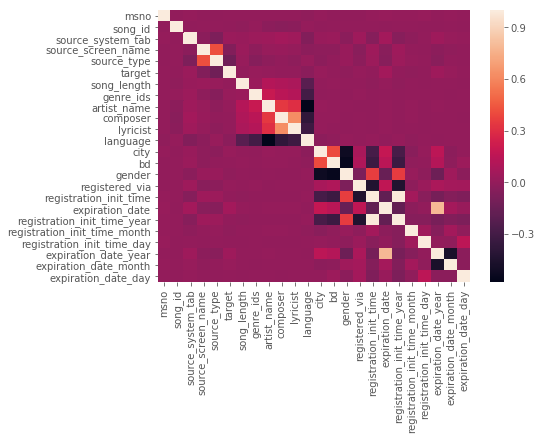

In [29]:
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

In [30]:
df.corr()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
msno,1.000000,-0.000787,0.009565,-0.006652,-0.003570,0.002245,0.001823,0.002925,0.003785,0.004515,...,-0.004938,-0.002005,0.006563,0.012292,0.005732,0.011074,0.012150,0.002797,0.011017,0.001012
song_id,-0.000787,1.000000,-0.005672,0.002990,0.004540,-0.003165,-0.009758,0.007145,-0.019725,-0.034036,...,0.001284,0.000305,0.000842,-0.001444,0.000989,0.000121,-0.001175,-0.001504,0.001146,-0.002533
source_system_tab,0.009565,-0.005672,1.000000,-0.031127,-0.077110,0.027850,0.023915,0.034050,0.037489,0.056213,...,-0.027048,0.036628,-0.044371,0.055944,-0.040399,-0.015676,0.004078,0.038111,0.014035,0.007431
source_screen_name,-0.006652,0.002990,-0.031127,1.000000,0.415460,-0.056961,0.025839,-0.018034,0.012005,0.022242,...,0.019115,-0.032389,0.040285,-0.033064,0.038729,0.004641,-0.003699,-0.022080,-0.009307,-0.001486
source_type,-0.003570,0.004540,-0.077110,0.415460,1.000000,-0.125377,0.016643,-0.049577,-0.017582,-0.002439,...,0.023301,-0.025064,0.034877,-0.043160,0.032778,0.007011,0.000768,-0.035341,-0.000606,-0.006723
target,0.002245,-0.003165,0.027850,-0.056961,-0.125377,1.000000,-0.000590,0.015310,0.011549,-0.000120,...,-0.011709,0.009495,-0.002180,0.057290,-0.001180,-0.007019,-0.002932,0.040081,0.012802,0.001474
song_length,0.001823,-0.009758,0.023915,0.025839,0.016643,-0.000590,1.000000,0.024333,0.117400,0.098715,...,0.003457,0.002496,-0.006955,0.006627,-0.007286,0.002883,-0.001321,0.005125,0.000339,-0.000905
genre_ids,0.002925,0.007145,0.034050,-0.018034,-0.049577,0.015310,0.024333,1.000000,0.193674,0.146387,...,-0.006414,0.005847,-0.004100,0.004046,-0.004778,0.003149,0.002054,0.005124,-0.005152,0.000445
artist_name,0.003785,-0.019725,0.037489,0.012005,-0.017582,0.011549,0.117400,0.193674,1.000000,0.340801,...,-0.000450,-0.001145,-0.005611,0.008817,-0.006220,0.006281,-0.000746,0.005486,0.002162,0.001216
composer,0.004515,-0.034036,0.056213,0.022242,-0.002439,-0.000120,0.098715,0.146387,0.340801,1.000000,...,-0.003554,0.001613,-0.005884,0.007650,-0.006406,0.005899,-0.003575,0.004819,0.002258,-0.001837


In [31]:
# Model with the best estimator
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(df[df.columns[df.columns != 'target']], df.target)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

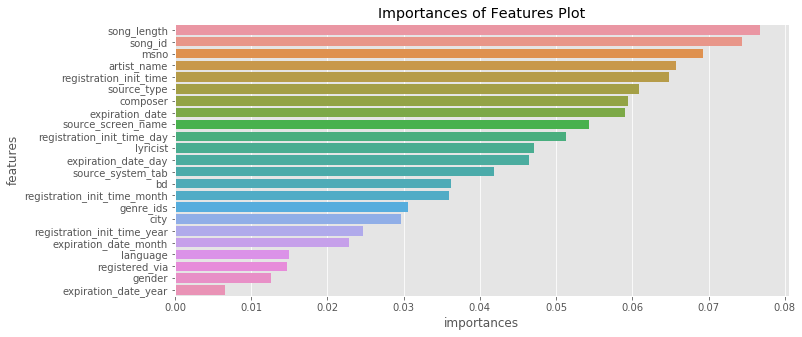

In [33]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

# XGboost

In [34]:
model.feature_importances_


array([0.06926786, 0.07433518, 0.04182239, 0.05431953, 0.06085745,
       0.07669148, 0.03054899, 0.0657326 , 0.05947395, 0.04709297,
       0.0149914 , 0.02965696, 0.03619949, 0.01253939, 0.01475032,
       0.06487045, 0.05910237, 0.02473541, 0.03591492, 0.0512832 ,
       0.00655609, 0.02280892, 0.04644868])

In [35]:
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [36]:
list(df.columns)

['msno',
 'song_id',
 'source_system_tab',
 'source_screen_name',
 'source_type',
 'target',
 'song_length',
 'artist_name',
 'composer',
 'lyricist',
 'registration_init_time',
 'expiration_date',
 'registration_init_time_day',
 'expiration_date_day']

In [37]:
target = df.pop('target')

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.3)

In [40]:
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model.fit(train_data, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=15, min_child_weight=5, missing=None,
       n_estimators=250, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [41]:
predict_labels = model.predict(test_data)
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66    109730
           1       0.67      0.70      0.68    111593

   micro avg       0.67      0.67      0.67    221323
   macro avg       0.67      0.67      0.67    221323
weighted avg       0.67      0.67      0.67    221323

